In [53]:
import pandas as pd

# ✅ Define file path (Update as per your system)
file_path = r"C:\Users\Mr Business\Downloads\AUD_Project_Data.csv"

# ✅ Load dataset
df = pd.read_csv(file_path)

# ✅ Display dataset info
print(f"✅ Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("\n🔹 Column Names & Data Types:")
print(df.dtypes)

# ✅ Check for missing values
print("\n❌ Missing Values Per Column:")
print(df.isna().sum())

# ✅ Display first few rows
print("\n🔍 First 5 Rows:")
display(df.head())


✅ Data Loaded: 24947 rows, 10 columns

🔹 Column Names & Data Types:
stars_x          int64
useful           int64
text            object
name            object
postal_code      int64
review_count     int64
categories      object
year             int64
month            int64
Day_Of_Week     object
dtype: object

❌ Missing Values Per Column:
stars_x         0
useful          0
text            0
name            0
postal_code     0
review_count    0
categories      0
year            0
month           0
Day_Of_Week     0
dtype: int64

🔍 First 5 Rows:


,stars_x,useful,text,name,postal_code,review_count,categories,year,month,Day_Of_Week
0,5,5,Second stop for Center City Restaurant Week: ...,R2L,19102,787,"American (New), Lounges, Nightlife, Cocktail B...",2015,9,Thursday
1,5,3,I moved from Chicago to Philadelphia over a ye...,Kanella,19107,579,"Mediterranean, Food, Greek, Restaurants, Break...",2013,8,Saturday
2,5,2,After trying twice unsuccessfully to get there...,Octopus Falafel Truck,19103,420,"Food Trucks, Falafel, Food Stands, Food, Medit...",2016,10,Wednesday
3,5,5,This place is game changer for the neighborhoo...,Los Caballos Locos,19148,31,"Salvadoran, Desserts, Mexican, Restaurants, Fo...",2015,9,Thursday
4,5,9,Went here for dinner on opening day and was SO...,iPho Vietnamese Restaurant,19130,151,"Vietnamese, Restaurants",2016,2,Wednesday


In [55]:
# ✅ Drop rows where 'text' column is missing (essential for NLP)
df = df.dropna(subset=['text'])

# ✅ Convert 'year' & 'month' to integer (if not already)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# ✅ Ensure 'text' column is string
df['text'] = df['text'].astype(str)

# ✅ Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# ✅ Confirm changes
print("✅ Data Cleaning Done!")
print("\n🔹 Updated Column Names:")
print(df.columns)

print("\n🔍 Sample Data After Cleaning:")
display(df.head())


✅ Data Cleaning Done!

🔹 Updated Column Names:
Index(['stars_x', 'useful', 'text', 'name', 'postal_code', 'review_count',
       'categories', 'year', 'month', 'day_of_week'],
      dtype='object')

🔍 Sample Data After Cleaning:


,stars_x,useful,text,name,postal_code,review_count,categories,year,month,day_of_week
0,5,5,Second stop for Center City Restaurant Week: ...,R2L,19102,787,"American (New), Lounges, Nightlife, Cocktail B...",2015,9,Thursday
1,5,3,I moved from Chicago to Philadelphia over a ye...,Kanella,19107,579,"Mediterranean, Food, Greek, Restaurants, Break...",2013,8,Saturday
2,5,2,After trying twice unsuccessfully to get there...,Octopus Falafel Truck,19103,420,"Food Trucks, Falafel, Food Stands, Food, Medit...",2016,10,Wednesday
3,5,5,This place is game changer for the neighborhoo...,Los Caballos Locos,19148,31,"Salvadoran, Desserts, Mexican, Restaurants, Fo...",2015,9,Thursday
4,5,9,Went here for dinner on opening day and was SO...,iPho Vietnamese Restaurant,19130,151,"Vietnamese, Restaurants",2016,2,Wednesday


In [57]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# ✅ Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# ✅ Load SpaCy English Model
nlp = spacy.load("en_core_web_sm")

# ✅ Define stopwords
stop_words = set(stopwords.words('english'))

# ✅ Text Preprocessing Function
def preprocess_text(text):
    """Tokenizes, removes stopwords, and lemmatizes text."""
    if not isinstance(text, str) or text.strip() == "":
        return []
    
    text = text.lower()  # Convert to lowercase
    doc = nlp(text)  # Process text using spaCy
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    
    return tokens

# ✅ Apply preprocessing to 'text' column
df["processed_text"] = df["text"].apply(preprocess_text)

# ✅ Confirm changes
print("✅ Text Preprocessing Done!")
print("\n🔹 Sample Processed Text:")
display(df[["text", "processed_text"]].head())


[nltk_data] Downloading package stopwords to C:\Users\Mr
[nltk_data]     Business\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Mr
[nltk_data]     Business\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Text Preprocessing Done!

🔹 Sample Processed Text:


,text,processed_text
0,Second stop for Center City Restaurant Week: ...,"[second, stop, center, city, restaurant, week,..."
1,I moved from Chicago to Philadelphia over a ye...,"[move, chicago, philadelphia, year, ago, every..."
2,After trying twice unsuccessfully to get there...,"[try, twice, unsuccessfully, get, early, enoug..."
3,This place is game changer for the neighborhoo...,"[place, game, changer, neighborhood, get, take..."
4,Went here for dinner on opening day and was SO...,"[go, dinner, opening, day, happy, great, atmos..."


In [59]:
import os

# ✅ Define CSV path
tokenized_csv_path = "C:/Users/Mr Business/Downloads/Tokenized_Data.csv"

# ✅ Check if CSV exists
if os.path.exists(tokenized_csv_path):
    print(f"✅ Loading tokenized data from {tokenized_csv_path}...")
    df = pd.read_csv(tokenized_csv_path)
else:
    print("⚡ Saving tokenized data for future use...")

    # ✅ Ensure 'processed_text' is stored as a string for CSV
    df["processed_text"] = df["processed_text"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

    # ✅ Save to CSV
    df.to_csv(tokenized_csv_path, index=False)
    print(f"✅ Tokenized data saved to {tokenized_csv_path}!")

# ✅ Display sample data
print("\n🔹 Sample Tokenized Data:")
display(df[["text", "processed_text"]].head())


✅ Loading tokenized data from C:/Users/Mr Business/Downloads/Tokenized_Data.csv...

🔹 Sample Tokenized Data:


,text,processed_text
0,Second stop for Center City Restaurant Week: ...,second stop center city restaurant week dinner...
1,I moved from Chicago to Philadelphia over a ye...,move chicago philadelphia year ago everybody r...
2,After trying twice unsuccessfully to get there...,try twice unsuccessfully get early enough get ...
3,This place is game changer for the neighborhoo...,place game changer neighborhood get take tonig...
4,Went here for dinner on opening day and was SO...,go dinner opening day happy great atmosphere l...


In [9]:
import pandas as pd
import nltk
import spacy

# ✅ Download required NLTK data
nltk.download("stopwords")
nltk.download("punkt")

# ✅ Load spaCy model
nlp = spacy.load("en_core_web_sm")

# ✅ Load Tokenized Data
tokenized_data_path = r"C:\Users\Mr Business\Downloads\Tokenized_Data.csv"
df = pd.read_csv(tokenized_data_path)

# ✅ Check the first few rows
print("Before Fixing:", df["processed_text"].head())

# ✅ Define stopwords
stop_words = set(nltk.corpus.stopwords.words("english"))

# ✅ Function to tokenize properly
def tokenize_text(text):
    """Tokenizes, removes stopwords, and lemmatizes text properly."""
    if not isinstance(text, str) or text.strip() == "":
        return []  # Return an empty list if the text is invalid

    doc = nlp(text.lower())  # Process text using spaCy
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]

    return tokens

# ✅ Apply Tokenization
df["processed_text"] = df["processed_text"].apply(tokenize_text)

# ✅ Verify Changes
print("\nAfter Fixing:", df["processed_text"].head())

# ✅ Save the cleaned tokenized data again
fixed_data_path = r"C:\Users\Mr Business\Downloads\Tokenized_Data_Fixed.csv"
df.to_csv(fixed_data_path, index=False)

print(f"\n✅ Fixed Tokenized Data Saved at: {fixed_data_path}")



[nltk_data] Downloading package stopwords to C:\Users\Mr
[nltk_data]     Business\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Mr
[nltk_data]     Business\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Before Fixing: 0    second stop center city restaurant week dinner...
1    move chicago philadelphia year ago everybody r...
2    try twice unsuccessfully get early enough get ...
3    place game changer neighborhood get take tonig...
4    go dinner opening day happy great atmosphere l...
Name: processed_text, dtype: object

After Fixing: 0    [second, stop, center, city, restaurant, week,...
1    [move, chicago, philadelphia, year, ago, every...
2    [try, twice, unsuccessfully, get, early, enoug...
3    [place, game, changer, neighborhood, get, take...
4    [go, dinner, opening, day, happy, great, atmos...
Name: processed_text, dtype: object

✅ Fixed Tokenized Data Saved at: C:\Users\Mr Business\Downloads\Tokenized_Data_Fixed.csv


In [61]:
import pandas as pd
import os
import gensim
from gensim import corpora
from gensim.models import LdaModel

# ✅ Path to Fixed Tokenized Data
tokenized_data_path = r"C:\Users\Mr Business\Downloads\Tokenized_Data_Fixed.csv"

# ✅ Load Tokenized Data
if os.path.exists(tokenized_data_path):
    df = pd.read_csv(tokenized_data_path)
    df["processed_text"] = df["processed_text"].apply(eval)  # Convert from string to list
    print("✅ Loaded Preprocessed Data from CSV!")
else:
    raise FileNotFoundError(f"❌ Tokenized data not found at {tokenized_data_path}")

# ✅ Create Dictionary & Corpus
dictionary = corpora.Dictionary(df["processed_text"])
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=5000)  # Remove rare/frequent words

corpus = [dictionary.doc2bow(text) for text in df["processed_text"]]

# ✅ Train LDA Model with 12 Topics
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=12,  # Using 12 topics for better granularity
    passes=10,
    iterations=400,
    random_state=42
)

# ✅ Display Identified Topics
print("\n--- Identified Topics (LDA) ---")
topic_labels = {}  # Dictionary to store topic labels
for idx, topic in lda_model.show_topics(formatted=False, num_topics=12, num_words=10):
    topic_words = [word for word, _ in topic]
    topic_name = " & ".join(topic_words[:3])  # Create a label using top 3 words
    topic_labels[f"Topic {idx}"] = topic_name  # Store for later use
    print(f"Topic {idx}: {topic_name} -> {', '.join(topic_words)}")

# ✅ Assign Topics to Reviews
df["dominant_topic"] = [max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus]
df["topic_name"] = df["dominant_topic"].map(topic_labels)

# ✅ Save Assigned Topics
output_path = r"C:\Users\Mr Business\Downloads\LDA_Assigned_Topics.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ LDA Model Training Completed & Topics Labeled! Saved to: {output_path}")


✅ Loaded Preprocessed Data from CSV!

--- Identified Topics (LDA) ---
Topic 0: get & place & go -> get, place, go, time, like, one, make, take, eat, say
Topic 1: dish & restaurant & menu -> dish, restaurant, menu, meal, order, one, like, make, dessert, would
Topic 2: chicken & get & come -> chicken, get, come, order, place, really, food, try, like, sauce
Topic 3: sandwich & cheese & burger -> sandwich, cheese, burger, fry, cheesesteak, steak, order, meat, philly, onion
Topic 4: taco & donut & mexican -> taco, donut, mexican, chip, burrito, salsa, margarita, guacamole, flavor, fresh
Topic 5: pizza & pie & slice -> pizza, pie, slice, cheese, sauce, crust, fresh, tomato, italian, order
Topic 6: pork & spicy & dish -> pork, spicy, dish, sauce, chicken, hot, dan, beef, korean, spice
Topic 7: great & food & bar -> great, food, bar, place, beer, drink, come, go, get, night
Topic 8: roll & order & soup -> roll, order, soup, noodle, food, sushi, place, rice, thai, dumple
Topic 9: food & place &

In [63]:
import pandas as pd
import os

# ✅ Path to Save Topics
topics_output_path = r"C:\Users\Mr Business\Downloads\LDA_Topics.csv"

# ✅ Create DataFrame of Topics
topics_df = pd.DataFrame([
    {"Topic Number": idx, "Topic Name": topic_labels[f"Topic {idx}"], "Top Words": ", ".join([word for word, _ in topic])}
    for idx, topic in lda_model.show_topics(formatted=False, num_topics=12, num_words=10)
])

# ✅ Save to CSV
topics_df.to_csv(topics_output_path, index=False)
print(f"✅ LDA Topics saved to: {topics_output_path}")

# ✅ Show First Few Rows
topics_df.head()



✅ LDA Topics saved to: C:\Users\Mr Business\Downloads\LDA_Topics.csv


,Topic Number,Topic Name,Top Words
0,0,get & place & go,"get, place, go, time, like, one, make, take, e..."
1,1,dish & restaurant & menu,"dish, restaurant, menu, meal, order, one, like..."
2,2,chicken & get & come,"chicken, get, come, order, place, really, food..."
3,3,sandwich & cheese & burger,"sandwich, cheese, burger, fry, cheesesteak, st..."
4,4,taco & donut & mexican,"taco, donut, mexican, chip, burrito, salsa, ma..."


In [65]:
# ✅ Assign Dominant Topic to Each Review
df["dominant_topic"] = [
    max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus
]

# ✅ Map Topic Names
df["topic_name"] = df["dominant_topic"].map(topic_labels)

# ✅ Path to Save Reviews with Topics
reviews_output_path = r"C:\Users\Mr Business\Downloads\LDA_Assigned_Reviews.csv"

# ✅ Save to CSV
df.to_csv(reviews_output_path, index=False)
print(f"✅ Reviews with Topics saved to: {reviews_output_path}")

# ✅ Show First Few Rows
df.head()


✅ Reviews with Topics saved to: C:\Users\Mr Business\Downloads\LDA_Assigned_Reviews.csv


,stars_x,useful,text,name,postal_code,review_count,categories,year,month,day_of_week,processed_text,dominant_topic,topic_name
0,5,5,Second stop for Center City Restaurant Week: ...,R2L,19102,787,"American (New), Lounges, Nightlife, Cocktail B...",2015,9,Thursday,"[second, stop, center, city, restaurant, week,...",1,NaN
1,5,3,I moved from Chicago to Philadelphia over a ye...,Kanella,19107,579,"Mediterranean, Food, Greek, Restaurants, Break...",2013,8,Saturday,"[move, chicago, philadelphia, year, ago, every...",1,NaN
2,5,2,After trying twice unsuccessfully to get there...,Octopus Falafel Truck,19103,420,"Food Trucks, Falafel, Food Stands, Food, Medit...",2016,10,Wednesday,"[try, twice, unsuccessfully, get, early, enoug...",0,NaN
3,5,5,This place is game changer for the neighborhoo...,Los Caballos Locos,19148,31,"Salvadoran, Desserts, Mexican, Restaurants, Fo...",2015,9,Thursday,"[place, game, changer, neighborhood, get, take...",7,NaN
4,5,9,Went here for dinner on opening day and was SO...,iPho Vietnamese Restaurant,19130,151,"Vietnamese, Restaurants",2016,2,Wednesday,"[go, dinner, opening, day, happy, great, atmos...",7,NaN


In [67]:
# ✅ Ensure corpus is correctly built
print(f"Total Documents in Corpus: {len(corpus)}")
print(f"Total Reviews in DataFrame: {len(df)}")

# ✅ Assign Topics to Reviews Again
df["dominant_topic"] = [
    max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] if lda_model.get_document_topics(doc) else None
    for doc in corpus
]

# ✅ Check topic assignment
print("\n✅ Checking Topic Assignments:")
print("Unique values in 'dominant_topic':", df["dominant_topic"].unique())
print("Total rows with assigned topics:", df["dominant_topic"].notna().sum())

# ✅ Map Topic Names Again
df["topic_name"] = df["dominant_topic"].map(topic_labels)

# ✅ Check if Topic Names are still NaN
print("\n✅ Checking Topic Names After Mapping:")
print("Unique values in 'topic_name':", df["topic_name"].unique())
print("Total rows with assigned topic names:", df["topic_name"].notna().sum())



Total Documents in Corpus: 24947
Total Reviews in DataFrame: 24947

✅ Checking Topic Assignments:
Unique values in 'dominant_topic': [ 1  0  7  8  2  3  9 10  5  6 11  4]
Total rows with assigned topics: 24947

✅ Checking Topic Names After Mapping:
Unique values in 'topic_name': [nan]
Total rows with assigned topic names: 0


In [71]:
topic_labels = {}  # Rebuild topic labels
for idx, topic in lda_model.show_topics(formatted=False, num_topics=12, num_words=10):
    topic_words = [word for word, _ in topic]
    topic_name = " & ".join(topic_words[:3])  # Use top 3 words as label
    topic_labels[idx] = topic_name  # Store with integer index

# ✅ Map Again
df["topic_name"] = df["dominant_topic"].map(topic_labels)

print("\n✅ Re-Generated Topic Labels & Remapped")
print("Unique values in 'topic_name':", df["topic_name"].unique())



✅ Re-Generated Topic Labels & Remapped
Unique values in 'topic_name': ['dish & restaurant & menu' 'get & place & go' 'great & food & bar'
 'roll & order & soup' 'chicken & get & come' 'sandwich & cheese & burger'
 'food & place & great' 'brunch & cream & egg' 'pizza & pie & slice'
 'pork & spicy & dish' 'well & tea & sweet' 'taco & donut & mexican']


In [73]:
df.to_csv(r"C:\Users\Mr Business\Downloads\Fixed_Topic_Assignment.csv", index=False)
print("✅ Saved Fixed Topic Assignment to CSV")


✅ Saved Fixed Topic Assignment to CSV


C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


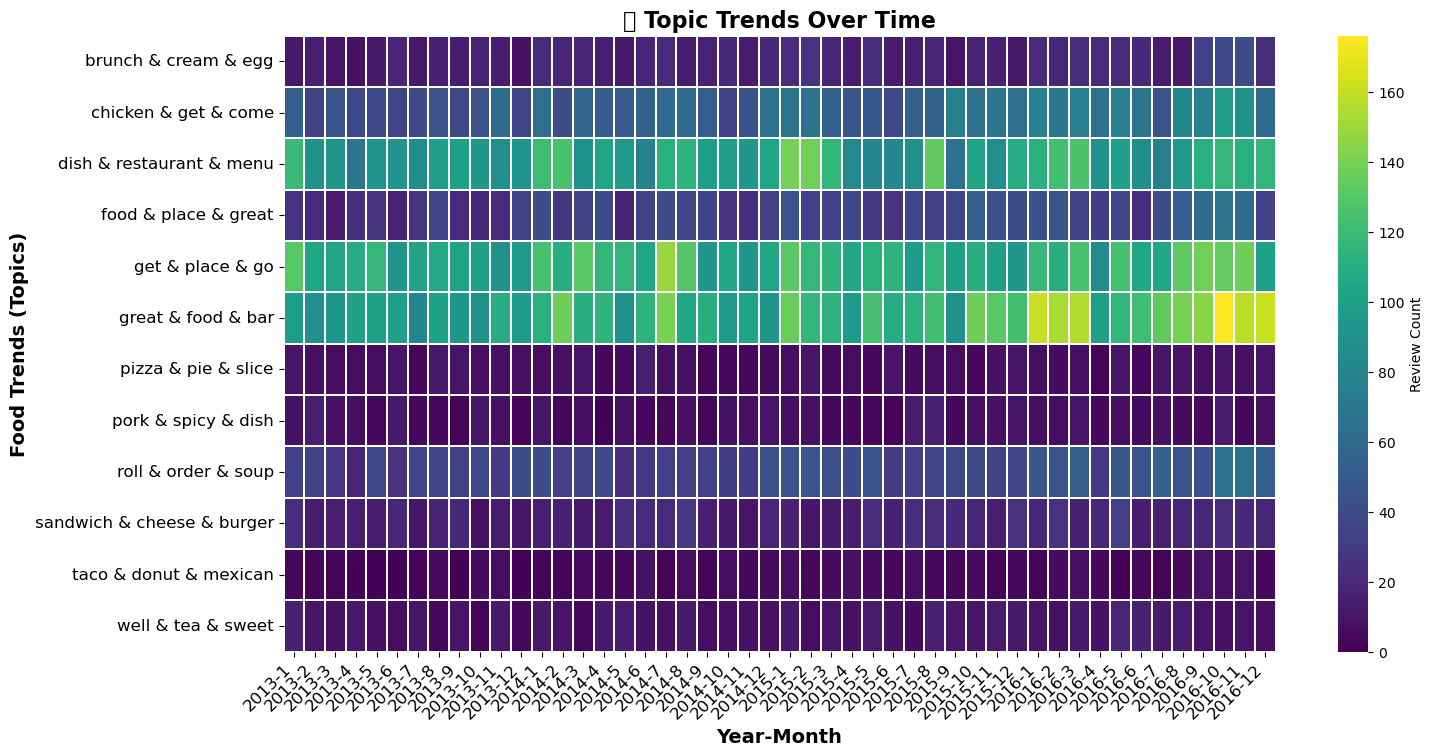

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Aggregate topic counts by year and month
topic_trends = df.groupby(["year", "month"])["topic_name"].value_counts().unstack().fillna(0)

# ✅ Plot heatmap with readability improvements
plt.figure(figsize=(16, 8))
ax = sns.heatmap(topic_trends.T, cmap="viridis", annot=False, linewidths=0.3, cbar_kws={"label": "Review Count"})

# ✅ Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Year-Month", fontsize=14, fontweight="bold")
plt.ylabel("Food Trends (Topics)", fontsize=14, fontweight="bold")
plt.title("🔥 Topic Trends Over Time", fontsize=16, fontweight="bold")

plt.show()



In [77]:
import pandas as pd

# ✅ Check Columns in DataFrame
print("Columns in df:", df.columns)

# ✅ Check for Missing Values
print("\nMissing values in 'year':", df["year"].isna().sum())
print("Missing values in 'topic_name':", df["topic_name"].isna().sum())

# ✅ Drop rows where 'topic_name' is missing
df = df.dropna(subset=["year", "topic_name"])

# ✅ Ensure "year" column is integer
df["year"] = df["year"].astype(int)

# ✅ Aggregate yearly topic counts
yearly_trends = df.groupby(["year", "topic_name"]).size().unstack(fill_value=0)

# ✅ Select the first and last available years dynamically
first_year, last_year = yearly_trends.index.min(), yearly_trends.index.max()

# ✅ Calculate percentage growth from first to last year
growth_rates = ((yearly_trends.loc[last_year] - yearly_trends.loc[first_year]) / yearly_trends.loc[first_year]) * 100
growth_rates = growth_rates.sort_values(ascending=False)

# ✅ Extract top 5 growing and declining trends
top_growing_trends = growth_rates.head(5)
top_declining_trends = growth_rates.tail(5)

# ✅ Display Results
print("\n📈 **Top Growing Food Trends:**")
print(top_growing_trends)

print("\n📉 **Top Declining Food Trends:**")
print(top_declining_trends)



Columns in df: Index(['stars_x', 'useful', 'text', 'name', 'postal_code', 'review_count',
       'categories', 'year', 'month', 'day_of_week', 'processed_text',
       'dominant_topic', 'topic_name'],
      dtype='object')

Missing values in 'year': 0
Missing values in 'topic_name': 0

📈 **Top Growing Food Trends:**
topic_name
taco & donut & mexican    100.000000
brunch & cream & egg       88.235294
food & place & great       82.986111
chicken & get & come       72.386588
great & food & bar         49.738676
dtype: float64

📉 **Top Declining Food Trends:**
topic_name
well & tea & sweet          35.416667
dish & restaurant & menu    13.924051
get & place & go            13.040000
pizza & pie & slice         -2.272727
pork & spicy & dish         -3.750000
dtype: float64


C:\Users\Mr Business\AppData\Local\Temp\ipykernel_4220\2122411758.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=trend_changes.index, x=trend_changes.values, palette=colors)
C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


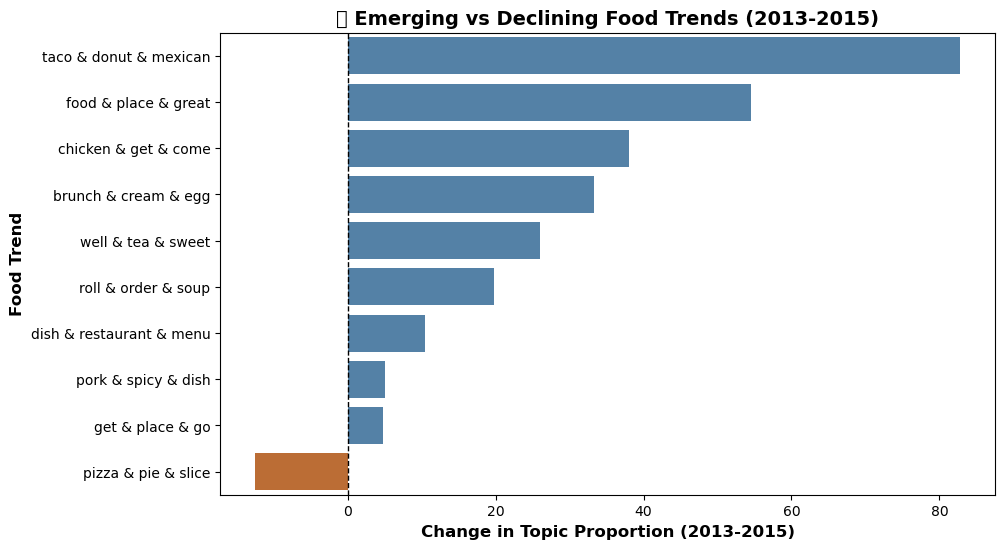

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Aggregate yearly topic counts
yearly_trends = df.groupby(["year", "topic_name"]).size().unstack(fill_value=0)

# ✅ Calculate percentage growth from first to last year
growth_rates = ((yearly_trends.loc[2015] - yearly_trends.loc[2013]) / yearly_trends.loc[2013]) * 100
growth_rates = growth_rates.sort_values(ascending=False)

# ✅ Extract top 5 growing and declining trends
top_growing_trends = growth_rates.head(5)
top_declining_trends = growth_rates.tail(5)

# ✅ Combine into one DataFrame
trend_changes = pd.concat([top_growing_trends, top_declining_trends])

# ✅ Define color scheme
colors = ["#4682B4" if x > 0 else "#D2691E" for x in trend_changes]  # Blue for growth, Brown for decline

# ✅ Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=trend_changes.index, x=trend_changes.values, palette=colors)

# ✅ Add labels and styling
plt.axvline(0, color="black", linestyle="dashed", linewidth=1)
plt.xlabel("Change in Topic Proportion (2013-2015)", fontsize=12, fontweight="bold")
plt.ylabel("Food Trend", fontsize=12, fontweight="bold")
plt.title("📊 Emerging vs Declining Food Trends (2013-2015)", fontsize=14, fontweight="bold")

# ✅ Show the chart
plt.show()


C:\Users\Mr Business\AppData\Local\Temp\ipykernel_4220\1786475529.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=trend_changes.index, x=trend_changes.values, palette=colors)
C:\Users\Mr Business\AppData\Local\Temp\ipykernel_4220\1786475529.py:25: UserWarning: The palette list has more values (14) than needed (12), which may not be intended.
  sns.barplot(y=trend_changes.index, x=trend_changes.values, palette=colors)
C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


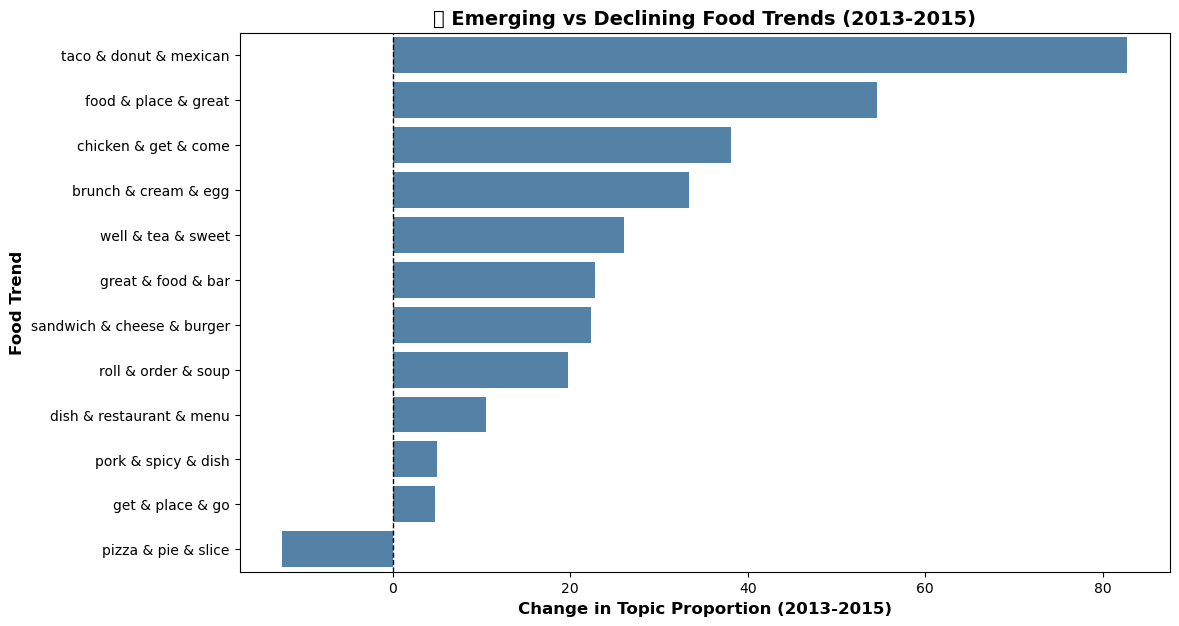

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Aggregate yearly topic counts
yearly_trends = df.groupby(["year", "topic_name"]).size().unstack(fill_value=0)

# ✅ Calculate percentage growth from first to last year
growth_rates = ((yearly_trends.loc[2015] - yearly_trends.loc[2013]) / yearly_trends.loc[2013]) * 100
growth_rates = growth_rates.sort_values(ascending=False)

# ✅ Extract top N growing and declining trends
N = 7  # Set how many trends to display
top_growing_trends = growth_rates.head(N)
top_declining_trends = growth_rates.tail(N)

# ✅ Combine into one DataFrame
trend_changes = pd.concat([top_growing_trends, top_declining_trends])

# ✅ Define color scheme (Blue for growth, Brown for decline)
colors = ["#4682B4" if x > 0 else "#D2691E" for x in trend_changes]  

# ✅ Plot horizontal bar chart
plt.figure(figsize=(12, 7))
sns.barplot(y=trend_changes.index, x=trend_changes.values, palette=colors)

# ✅ Add labels and styling
plt.axvline(0, color="black", linestyle="dashed", linewidth=1)  # Zero baseline
plt.xlabel("Change in Topic Proportion (2013-2015)", fontsize=12, fontweight="bold")
plt.ylabel("Food Trend", fontsize=12, fontweight="bold")
plt.title("📊 Emerging vs Declining Food Trends (2013-2015)", fontsize=14, fontweight="bold")

# ✅ Show the chart
plt.show()


In [83]:
!pip install wordcloud


C:\Users\Mr Business\AppData\Local\Temp\ipykernel_4220\1630264807.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ingredient_df["Ingredient"], x=ingredient_df["Frequency"], palette="viridis")
C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


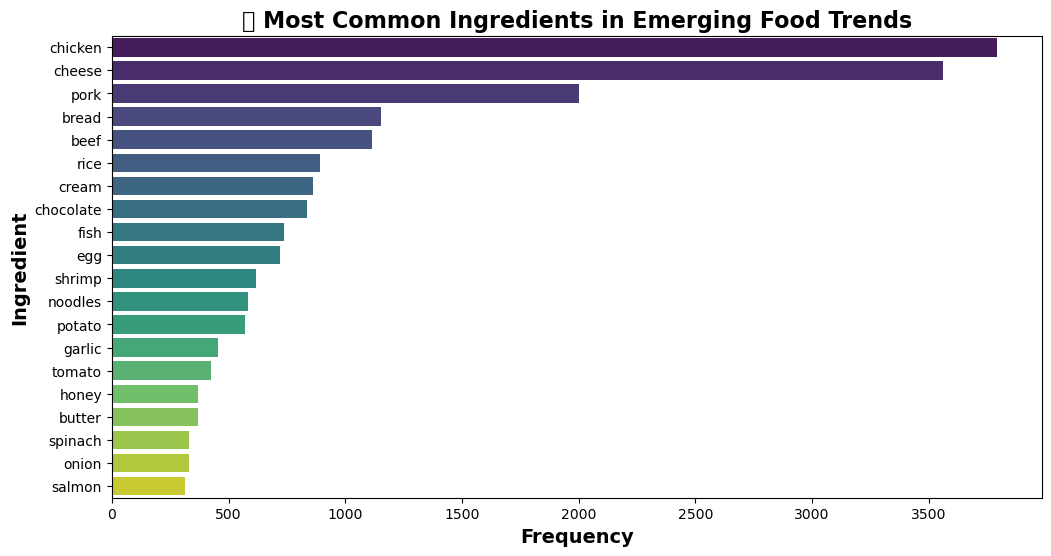

In [85]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# ✅ Load SpaCy NLP Model
nlp = spacy.load("en_core_web_sm")

# ✅ Define a List of Common Food Ingredients
common_ingredients = set([
    "chicken", "beef", "pork", "fish", "salmon", "shrimp", "tofu", "cheese", "egg",
    "butter", "milk", "cream", "flour", "sugar", "garlic", "onion", "tomato",
    "potato", "lettuce", "spinach", "carrot", "pepper", "olive oil", "basil", "thyme",
    "cinnamon", "honey", "rice", "pasta", "bread", "noodles", "avocado", "coconut",
    "chocolate", "strawberry", "blueberry", "banana", "apple", "mango", "walnut",
    "peanut", "almond", "yogurt", "soy", "vinegar", "ketchup", "mustard", "mayonnaise"
])

# ✅ Extract Text from Emerging Trends
emerging_trend_texts = df[df["topic_name"].isin(top_growing_trends.index)]["text"]

# ✅ Extract Ingredients Using SpaCy NER
ingredient_counter = Counter()
for text in emerging_trend_texts:
    doc = nlp(text.lower())  # Process text
    for token in doc:
        if token.text in common_ingredients:  # Keep only actual food ingredients
            ingredient_counter[token.text] += 1

# ✅ Convert to DataFrame for Plotting
ingredient_df = pd.DataFrame(ingredient_counter.items(), columns=["Ingredient", "Frequency"])
ingredient_df = ingredient_df.sort_values(by="Frequency", ascending=False).head(20)  # Top 20 Ingredients

# ✅ Plot the Ingredients
plt.figure(figsize=(12, 6))
sns.barplot(y=ingredient_df["Ingredient"], x=ingredient_df["Frequency"], palette="viridis")

plt.xlabel("Frequency", fontsize=14, fontweight="bold")
plt.ylabel("Ingredient", fontsize=14, fontweight="bold")
plt.title("🍽️ Most Common Ingredients in Emerging Food Trends", fontsize=16, fontweight="bold")

plt.show()



In [87]:
# ✅ Manually Define Healthy & Unhealthy Topics Based on LDA Output
healthy_topics = [
    "brunch & cream & egg",  # Eggs & brunch can be healthy
    "well & tea & sweet"  # Tea can be associated with wellness
]

unhealthy_topics = [
    "pizza & pie & slice",  # Pizza is generally unhealthy
    "taco & donut & mexican",  # Donuts are high in sugar
    "sandwich & cheese & burger",  # Burgers and cheese-heavy foods
    "pork & spicy & dish",  # Pork & spicy fried foods
    "chicken & get & come"  # Likely fried chicken
]

# ✅ Assign Healthy, Unhealthy, or Other
def categorize_topic(topic):
    if topic in healthy_topics:
        return "Healthy"
    elif topic in unhealthy_topics:
        return "Unhealthy"
    else:
        return "Other"

# ✅ Apply Categorization to Data
df["category"] = df["topic_name"].apply(categorize_topic)

# ✅ Display Category Counts
print(df["category"].value_counts())



category
Other        19266
Unhealthy     4374
Healthy       1307
Name: count, dtype: int64


❌ Failed to fetch food categories from API. Using default dish list.


C:\Users\Mr Business\AppData\Local\Temp\ipykernel_4220\3098656805.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dish_trends, x="Mentions", y="Dish", palette="viridis")
C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


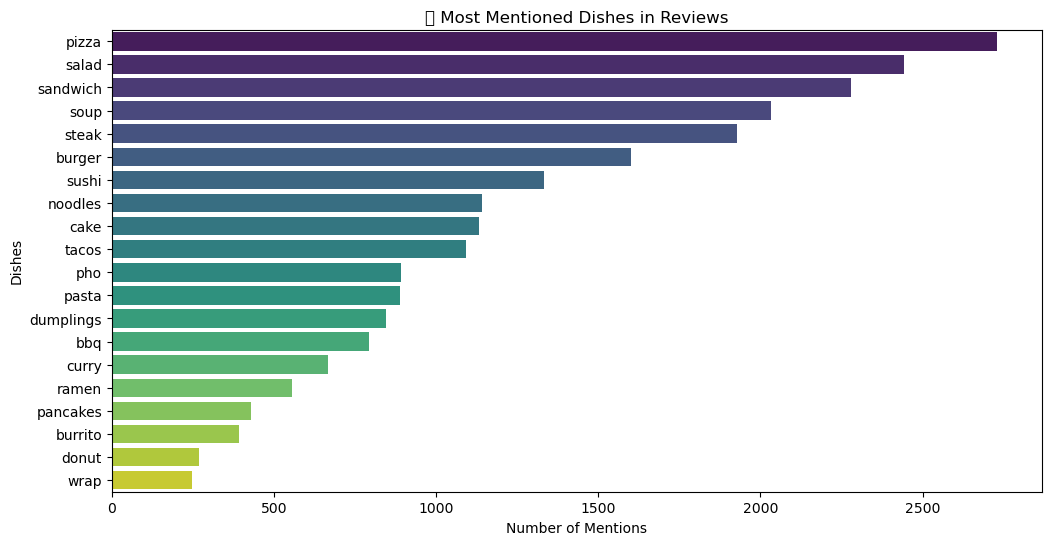

✅ Extracted Dishes Saved!


In [89]:
import pandas as pd
import requests
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load Data
df = pd.read_csv(r"C:\Users\Mr Business\Downloads\Tokenized_Data.csv")  # Update path if needed

# ✅ Step 1: Attempt to Fetch Dish List from Open Food Facts API
url = "https://world.openfoodfacts.org/categories.json"

try:
    response = requests.get(url, timeout=10)  # Set timeout to avoid hanging requests
    response.raise_for_status()  # Raise error if status is not 200 (OK)
    
    categories = response.json().get("tags", [])  # Extract categories safely
    if categories:
        dish_list = set([cat["name"].lower() for cat in categories if "food" in cat["name"].lower()])
        print("✅ Successfully Retrieved Food Categories!")
    else:
        raise ValueError("Empty categories list from API.")
except (requests.RequestException, ValueError, KeyError):
    print("❌ Failed to fetch food categories from API. Using default dish list.")
    dish_list = set([
        "pizza", "burger", "ramen", "biryani", "sushi", "steak", "tacos", "pasta",
        "falafel", "sandwich", "pancakes", "dumplings", "shawarma", "pho", "curry",
        "salad", "noodles", "burrito", "soup", "wrap", "bbq", "hotdog", "donut", "cake"
    ])

# ✅ Step 2: Function to Extract Dishes from Review Text
def extract_dishes(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    
    words = text.lower().split()
    dishes = [word for word in words if word in dish_list]  # Keep only words in dish list
    
    return dishes

# ✅ Step 3: Apply Extraction to Reviews
df["extracted_dishes"] = df["text"].apply(extract_dishes)

# ✅ Step 4: Count Dish Mentions
all_dishes = [dish for sublist in df["extracted_dishes"] for dish in sublist]
dish_counts = Counter(all_dishes).most_common(20)  # Get top 20 dishes

# ✅ Step 5: Convert to DataFrame
dish_trends = pd.DataFrame(dish_counts, columns=["Dish", "Mentions"])

# ✅ Step 6: Visualize Dish Trends
plt.figure(figsize=(12, 6))
sns.barplot(data=dish_trends, x="Mentions", y="Dish", palette="viridis")
plt.xlabel("Number of Mentions")
plt.ylabel("Dishes")
plt.title("🍽️ Most Mentioned Dishes in Reviews")
plt.show()

# ✅ Step 7: Save Extracted Dishes
df.to_csv(r"C:\Users\Mr Business\Downloads\Extracted_Dishes.csv", index=False)
print("✅ Extracted Dishes Saved!")


Columns in df: Index(['stars_x', 'useful', 'text', 'name', 'postal_code', 'review_count',
       'categories', 'year', 'month', 'day_of_week', 'processed_text',
       'extracted_dishes'],
      dtype='object')


C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


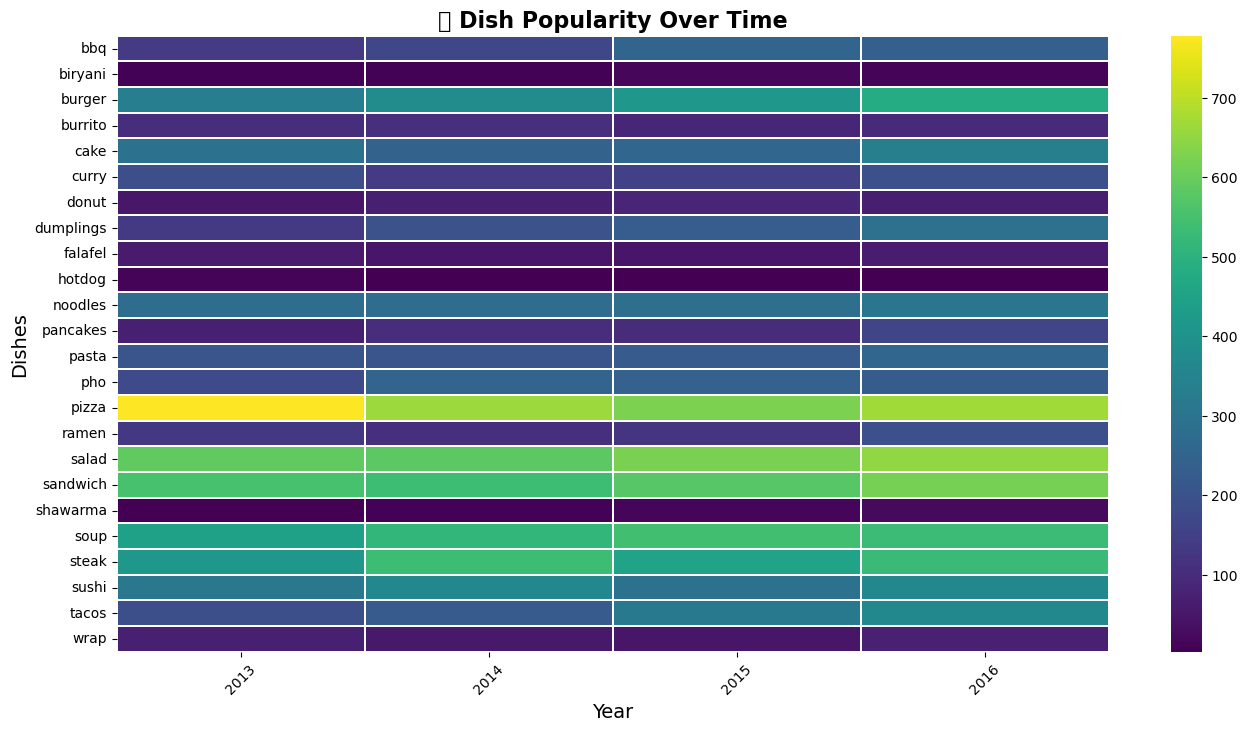

IndexError: list index out of range

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Check available columns
print("Columns in df:", df.columns)

# ✅ Ensure the correct dish column exists
dish_column = "extracted_dishes"  # Change to the actual column name if different

if dish_column not in df.columns:
    raise KeyError(f"❌ Column '{dish_column}' not found in DataFrame!")

# ✅ Convert to lists if stored as strings
df[dish_column] = df[dish_column].apply(lambda x: eval(x) if isinstance(x, str) else x)

# ✅ Aggregate dish mentions per year
dish_trends_df = df.explode(dish_column).groupby(["year", dish_column]).size().reset_index(name="count")

# ✅ Pivot for Heatmap (Dish Mentions Over Time)
dish_pivot = dish_trends_df.pivot(index=dish_column, columns="year", values="count").fillna(0)

# ✅ Compute Dish Growth Rates
first_year, last_year = dish_pivot.columns.min(), dish_pivot.columns.max()
growth_rates = ((dish_pivot[last_year] - dish_pivot[first_year]) / dish_pivot[first_year]) * 100
growth_rates = growth_rates.sort_values(ascending=False)

# ✅ Identify Top Growing & Declining Dishes
top_growing_dishes = growth_rates.head(10)
top_declining_dishes = growth_rates.tail(10)

# ✅ Create a Heatmap for Dish Trends Over Time
plt.figure(figsize=(16, 8))
sns.heatmap(dish_pivot, cmap="viridis", linewidths=0.3)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Dishes", fontsize=14)
plt.title("🔥 Dish Popularity Over Time", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

# ✅ Plot Top Growing & Declining Dishes
trend_changes_df = pd.DataFrame({
    "Dish": list(top_growing_dishes.index) + list(top_declining_dishes.index),
    "Trend Change": list(top_growing_dishes.values) + list(top_declining_dishes.values)
})

# ✅ Define Colors: Blue for Growth, Red for Decline
num_dishes = len(trend_changes_df)
blues = sns.color_palette("Blues", num_dishes // 2)
reds = sns.color_palette("Reds_r", num_dishes // 2)
colors = [blues[i] if x > 0 else reds[i] for i, x in enumerate(trend_changes_df["Trend Change"])]

# ✅ Create Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(data=trend_changes_df, x="Trend Change", y="Dish", palette=colors)
plt.axvline(0, color="black", linestyle="--")  # Reference line
plt.xlabel("Change in Mentions", fontsize=14)
plt.ylabel("Dish", fontsize=14)
plt.title("📈 Emerging vs Declining Dishes", fontsize=16, fontweight="bold")
plt.show()




In [93]:
print("Columns in df:", df.columns)


Columns in df: Index(['stars_x', 'useful', 'text', 'name', 'postal_code', 'review_count',
       'categories', 'year', 'month', 'day_of_week', 'processed_text',
       'extracted_dishes'],
      dtype='object')


C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


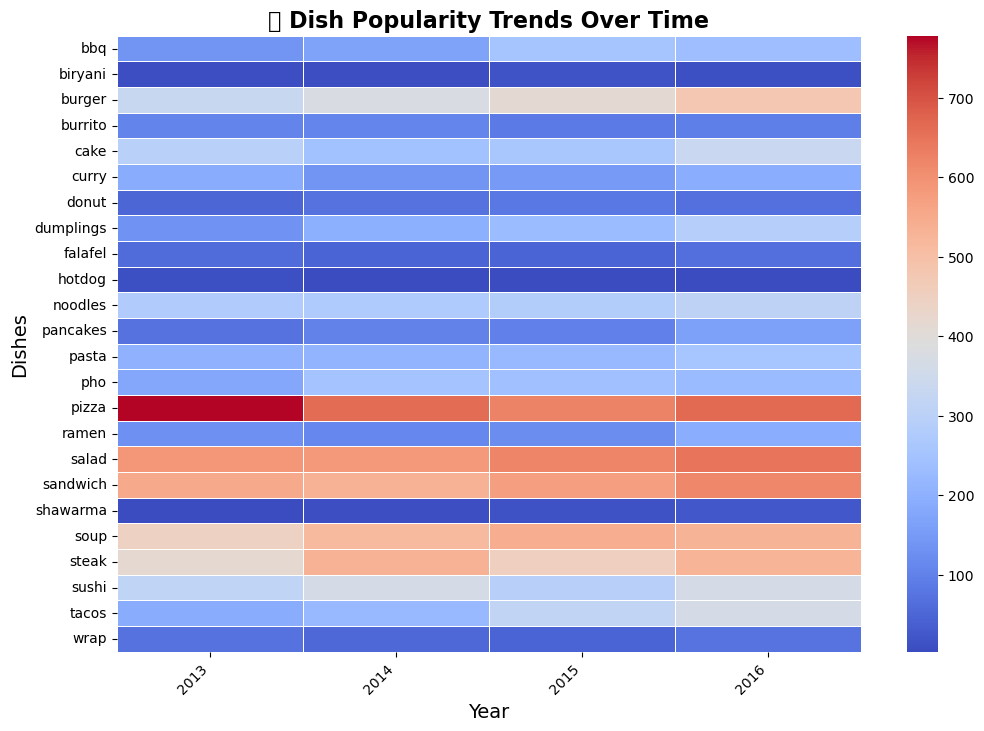

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Aggregate dish mentions per year
dish_trends_df = df.explode("extracted_dishes").groupby(["year", "extracted_dishes"]).size().reset_index(name="count")

# ✅ Pivot for Heatmap (Dish Mentions Over Time)
dish_pivot = dish_trends_df.pivot(index="extracted_dishes", columns="year", values="count").fillna(0)

# ✅ Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dish_pivot, cmap="coolwarm", linewidths=0.5, annot=False)

# ✅ Improve Readability
plt.xlabel("Year", fontsize=14)
plt.ylabel("Dishes", fontsize=14)
plt.title("🍽️ Dish Popularity Trends Over Time", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.show()


In [99]:
import pandas as pd

# ✅ Define Healthy & Unhealthy Keywords
healthy_keywords = {"salad", "avocado", "grilled", "quinoa", "vegan", "smoothie", "fruit", "vegetable", "yogurt"}
unhealthy_keywords = {"burger", "fries", "pizza", "bacon", "fried", "cake", "donut", "soda", "milkshake"}

# ✅ Function to Classify Dishes
def classify_dish(dish):
    dish = str(dish).lower()
    if any(word in dish for word in healthy_keywords):
        return "Healthy"
    elif any(word in dish for word in unhealthy_keywords):
        return "Unhealthy"
    else:
        return "Other"

# ✅ Ensure "extracted_dishes" is in the DataFrame
if "extracted_dishes" not in df.columns:
    raise KeyError("❌ Column 'extracted_dishes' not found in DataFrame!")

# ✅ Apply Classification to Extracted Dishes
df["food_category"] = df["extracted_dishes"].apply(lambda x: [classify_dish(dish) for dish in x] if isinstance(x, list) else [])

# ✅ Expand DataFrame to Count Healthy & Unhealthy Mentions
df_expanded = df.explode("food_category")

# ✅ Aggregate Trends by Postal Code
postal_trends = df_expanded.groupby("postal_code")["food_category"].value_counts().unstack(fill_value=0)

# ✅ Compute Healthy Percentage
postal_trends["Total"] = postal_trends.sum(axis=1)
postal_trends["Healthy %"] = (postal_trends["Healthy"] / postal_trends["Total"]) * 100

# ✅ Sort by Healthy Percentage
postal_trends = postal_trends.sort_values(by="Healthy %", ascending=False)

# ✅ Display the Table
import IPython.display as display
display.display(postal_trends.head(15))  # Show first 15 rows

# ✅ Save to CSV
postal_trends.to_csv("Healthy_vs_Unhealthy_Food_Trends_by_Postal_Code.csv")
print("\n✅ Data saved as 'Healthy_vs_Unhealthy_Food_Trends_by_Postal_Code.csv'!")


food_category,Healthy,Other,Unhealthy,Total,Healthy %
postal_code,,,,,
19112,12,24,5,41,29.268293
19102,169,570,284,1023,16.520039
19153,11,39,17,67,16.417910
19114,8,20,22,50,16.000000
19119,29,77,78,184,15.760870
19103,490,2031,740,3261,15.026066
19106,212,930,308,1450,14.620690
19152,12,33,41,86,13.953488
19127,34,120,102,256,13.281250



✅ Data saved as 'Healthy_vs_Unhealthy_Food_Trends_by_Postal_Code.csv'!


C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


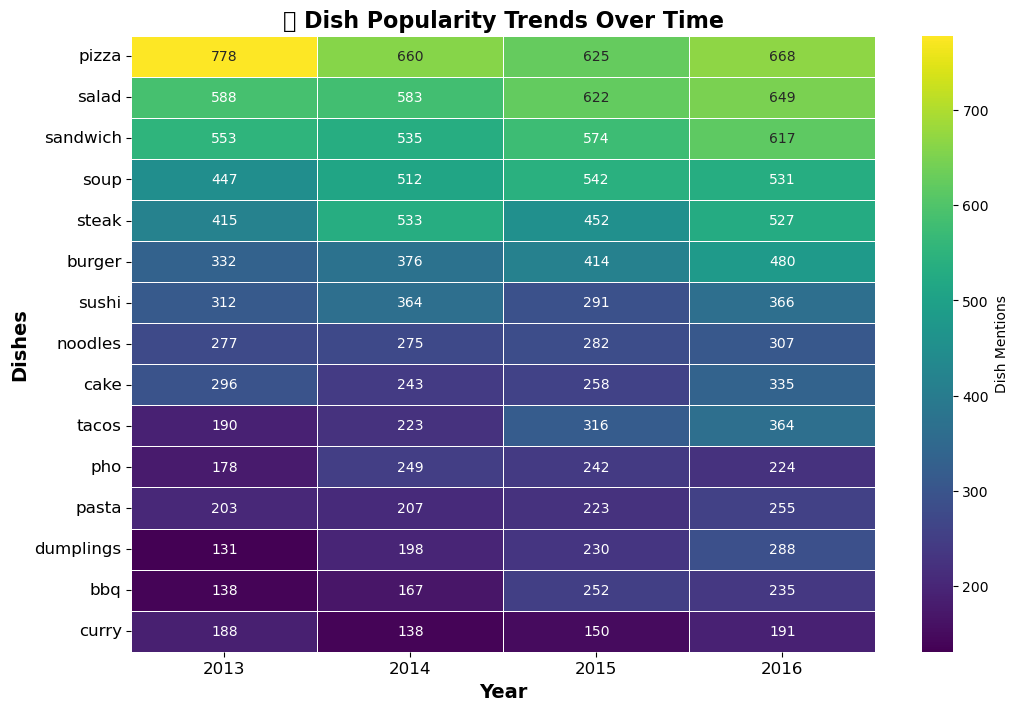

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Aggregate Dish Mentions Per Year
dish_trends_df = df.explode("extracted_dishes").groupby(["year", "extracted_dishes"]).size().reset_index(name="count")

# ✅ Pivot for Heatmap (Dish Mentions Over Time)
dish_pivot = dish_trends_df.pivot(index="extracted_dishes", columns="year", values="count").fillna(0)

# ✅ Select Top 15 Most Mentioned Dishes for Readability
top_dishes = dish_pivot.sum(axis=1).sort_values(ascending=False).head(15).index
dish_pivot = dish_pivot.loc[top_dishes]

# ✅ Plot Heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(dish_pivot, cmap="viridis", linewidths=0.5, annot=True, fmt=".0f", cbar_kws={"label": "Dish Mentions"})

# ✅ Improve Readability
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Dishes", fontsize=14, fontweight="bold")
plt.title("🍽️ Dish Popularity Trends Over Time", fontsize=16, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()


C:\Users\Mr Business\AppData\Local\Temp\ipykernel_4220\1152170385.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trend_changes_df, x="Trend Change", y="Dish", palette=colors)
C:\Users\Mr Business\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


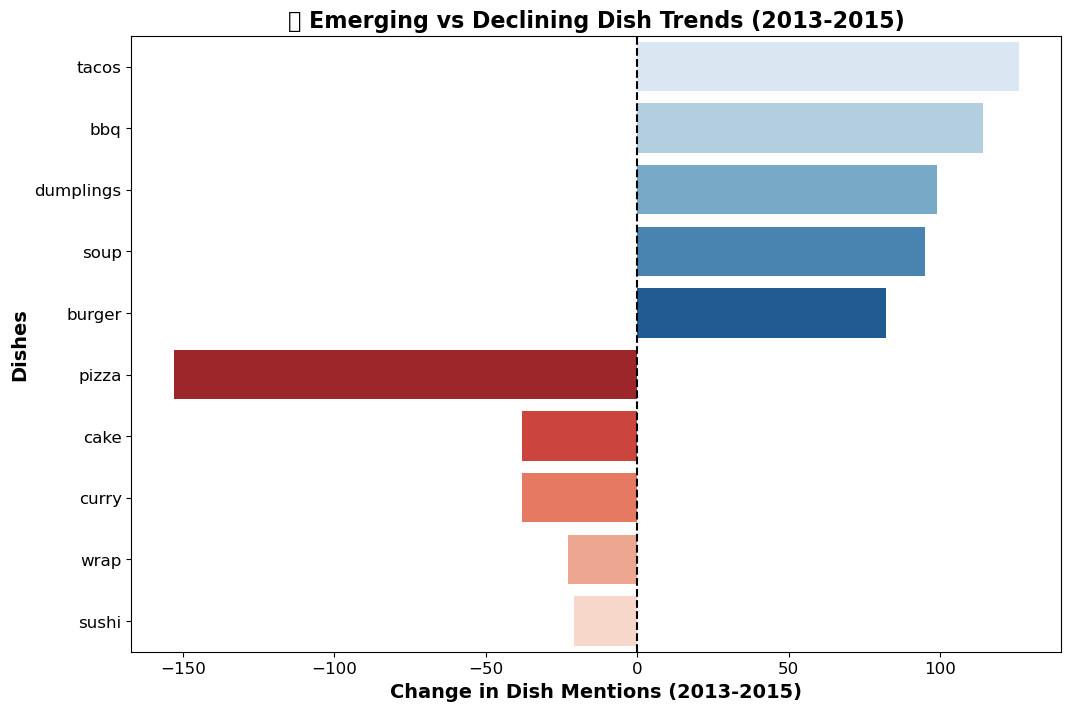

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Aggregate Dish Mentions Per Year
dish_trends_df = df.explode("extracted_dishes").groupby(["year", "extracted_dishes"]).size().reset_index(name="count")

# ✅ Pivot for Trend Analysis
dish_pivot = dish_trends_df.pivot(index="extracted_dishes", columns="year", values="count").fillna(0)

# ✅ Compute Trend Change Over Time (2015 - 2013)
trend_change = dish_pivot[2015] - dish_pivot[2013]

# ✅ Identify Top 5 Growing and Declining Dishes
top_growing = trend_change.sort_values(ascending=False).head(5)
top_declining = trend_change.sort_values(ascending=True).head(5)

# ✅ Combine Results for Visualization
trend_changes_df = pd.DataFrame({
    "Dish": list(top_growing.index) + list(top_declining.index),
    "Trend Change": list(top_growing.values) + list(top_declining.values)
})

# ✅ Define Custom Color Scheme (Blues for growth, Reds for decline)
num_dishes = len(trend_changes_df)
blues = sns.color_palette("Blues", num_dishes // 2)
reds = sns.color_palette("Reds_r", num_dishes // 2)
colors = [blues[i] if x > 0 else reds[i - len(blues)] for i, x in enumerate(trend_changes_df["Trend Change"])]

# ✅ Create Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=trend_changes_df, x="Trend Change", y="Dish", palette=colors)
plt.axvline(0, color="black", linestyle="--")  # Reference line

# ✅ Improve Readability
plt.xlabel("Change in Dish Mentions (2013-2015)", fontsize=14, fontweight="bold")
plt.ylabel("Dishes", fontsize=14, fontweight="bold")
plt.title("🍽️ Emerging vs Declining Dish Trends (2013-2015)", fontsize=16, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define Healthy and Unhealthy Keywords
healthy_keywords = ["salad", "quinoa", "smoothie", "grilled", "avocado", "veggie", "organic", "kale", "poke"]
unhealthy_keywords = ["burger", "fries", "fried", "cake", "pizza", "donut", "bacon", "bbq", "cheese", "ice cream"]

# ✅ Classify Dishes as Healthy or Unhealthy
def classify_dish(dish):
    dish = str(dish).lower()
    if any(word in dish for word in healthy_keywords):
        return "Healthy"
    elif any(word in dish for word in unhealthy_keywords):
        return "Unhealthy"
    return "Other"

df["health_category"] = df["extracted_dishes"].apply(lambda dishes: [classify_dish(dish) for dish in dishes])

# ✅ Expand Data (One Row per Dish)
df_exploded = df.explode("health_category")

# ✅ Aggregate Healthy & Unhealthy Counts by Postal Code
health_trends = df_exploded.groupby(["postal_code", "health_category"]).size().unstack(fill_value=0)

# ✅ Normalize Scores for Better Comparison
health_trends["Healthy Score"] = health_trends["Healthy"] / (health_trends["Healthy"] + health_trends["Unhealthy"] + 1e-5)
health_trends["Unhealthy Score"] = health_trends["Unhealthy"] / (health_trends["Healthy"] + health_trends["Unhealthy"] + 1e-5)

# ✅ Reset Index for Table Display
health_trends.reset_index(inplace=True)

# ✅ Show as a Table
import ace_tools as tools
tools.display_dataframe_to_user(name="Healthy vs Unhealthy Food Trends by Postal Code", dataframe=health_trends)

# ✅ Display Top 10 Healthiest & Unhealthiest Postal Codes
top_healthy = health_trends.sort_values(by="Healthy Score", ascending=False).head(10)
top_unhealthy = health_trends.sort_values(by="Unhealthy Score", ascending=False).head(10)

print("\n🏆 **Top 10 Healthiest Postal Codes:**")
print(top_healthy[["postal_code", "Healthy Score"]])

print("\n⚠️ **Top 10 Unhealthiest Postal Codes:**")
print(top_unhealthy[["postal_code", "Unhealthy Score"]])


ModuleNotFoundError: No module named 'ace_tools'

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Define Healthy and Unhealthy Keywords
healthy_keywords = ["salad", "quinoa", "smoothie", "grilled", "avocado", "veggie", "organic", "kale", "poke"]
unhealthy_keywords = ["burger", "fries", "fried", "cake", "pizza", "donut", "bacon", "bbq", "cheese", "ice cream"]

# ✅ Classify Dishes as Healthy or Unhealthy
def classify_dish(dish):
    dish = str(dish).lower()
    if any(word in dish for word in healthy_keywords):
        return "Healthy"
    elif any(word in dish for word in unhealthy_keywords):
        return "Unhealthy"
    return "Other"

df["health_category"] = df["extracted_dishes"].apply(lambda dishes: [classify_dish(dish) for dish in dishes])

# ✅ Expand Data (One Row per Dish)
df_exploded = df.explode("health_category")

# ✅ Aggregate Healthy & Unhealthy Counts by Postal Code
health_trends = df_exploded.groupby(["postal_code", "health_category"]).size().unstack(fill_value=0)

# ✅ Normalize Scores for Better Comparison
health_trends["Healthy Score"] = health_trends["Healthy"] / (health_trends["Healthy"] + health_trends["Unhealthy"] + 1e-5)
health_trends["Unhealthy Score"] = health_trends["Unhealthy"] / (health_trends["Healthy"] + health_trends["Unhealthy"] + 1e-5)

# ✅ Reset Index for Table Display
health_trends.reset_index(inplace=True)

# ✅ Display the Table
print("\n📌 **Healthy vs Unhealthy Food Trends by Postal Code:**")
print(health_trends.head(15))  # Show first 15 rows

# ✅ Display Top 10 Healthiest & Unhealthiest Postal Codes
top_healthy = health_trends.sort_values(by="Healthy Score", ascending=False).head(10)
top_unhealthy = health_trends.sort_values(by="Unhealthy Score", ascending=False).head(10)

print("\n🏆 **Top 10 Healthiest Postal Codes:**")
print(top_healthy[["postal_code", "Healthy Score"]])

print("\n⚠️ **Top 10 Unhealthiest Postal Codes:**")
print(top_unhealthy[["postal_code", "Unhealthy Score"]])



📌 **Healthy vs Unhealthy Food Trends by Postal Code:**
health_category  postal_code  Healthy  Other  Unhealthy  Healthy Score  \
0                      19102      169    557        297       0.362661   
1                      19103      490   1988        783       0.384918   
2                      19104      114    747        349       0.246220   
3                      19106      212    889        349       0.377897   
4                      19107      467   4057       1146       0.289523   
5                      19111        1     21         21       0.045455   
6                      19112       12     14         15       0.444444   
7                      19114        8     18         24       0.250000   
8                      19115       12     46         47       0.203390   
9                      19116       17    137         84       0.168317   
10                     19118       11     84         69       0.137500   
11                     19119       29     75         80 

In [127]:
!pip install folium geopy


   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   --------------------------------- ------ 92.2/110.5 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00


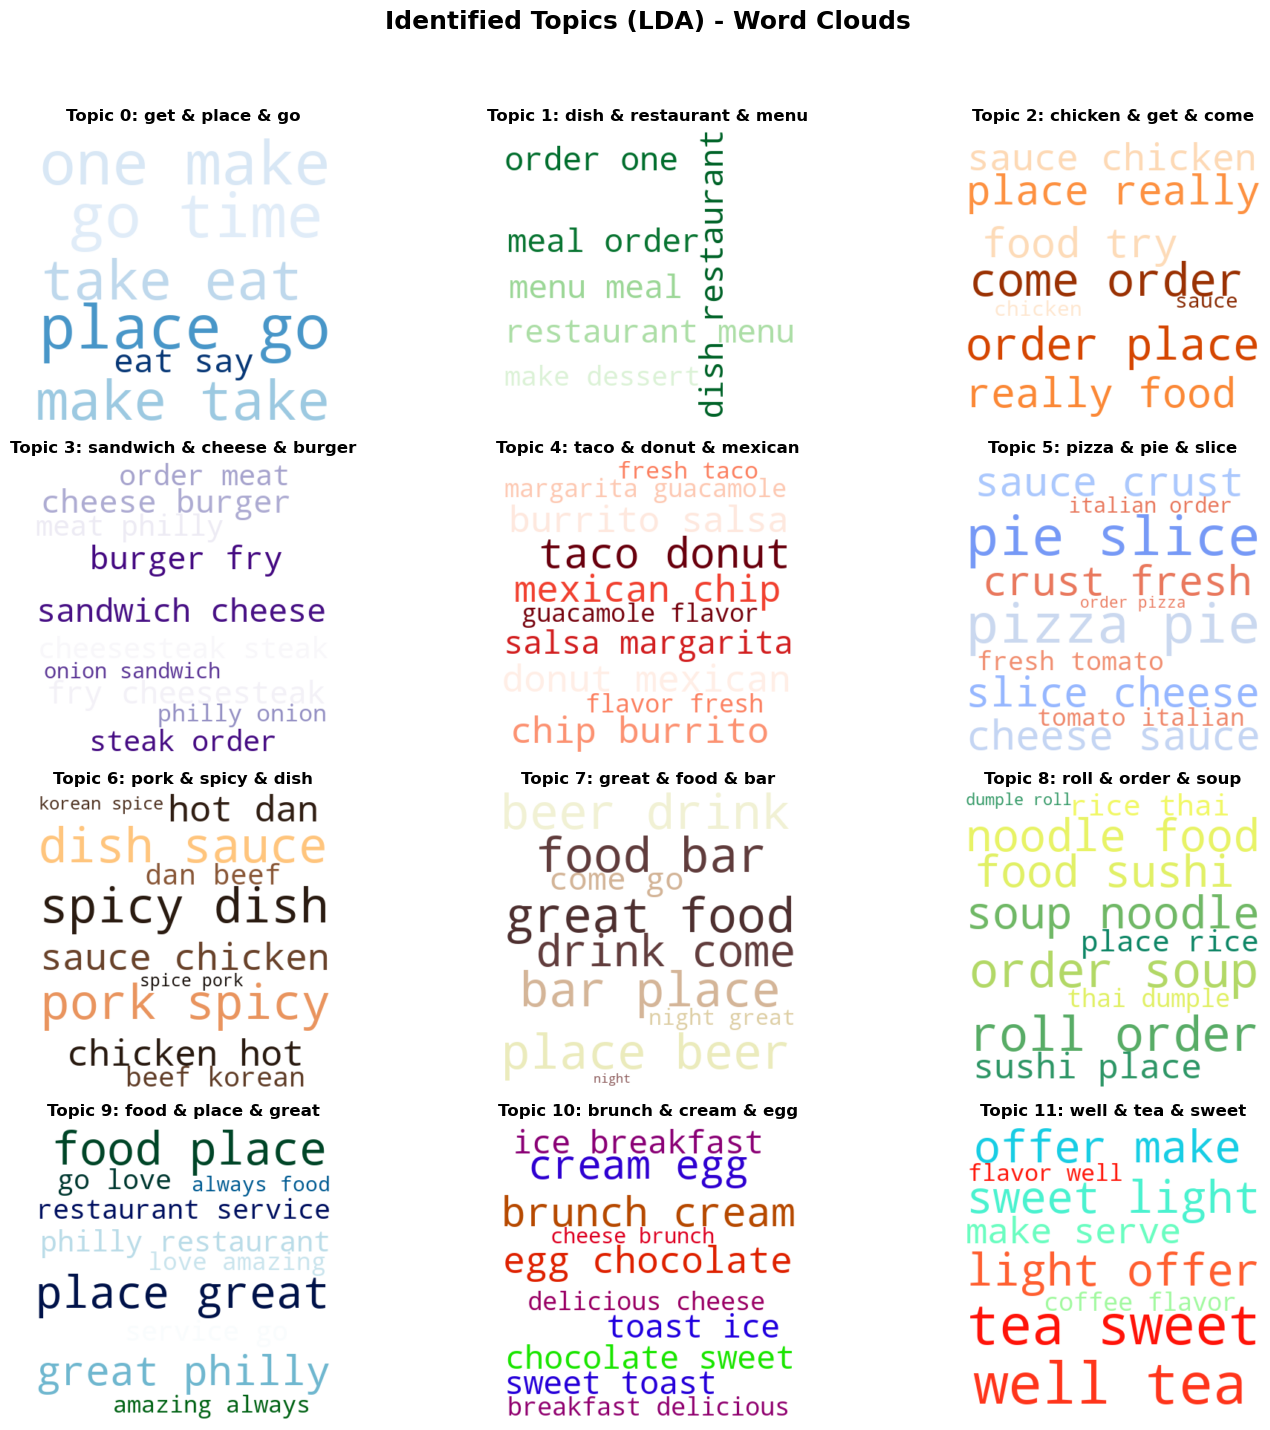

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Identified Topics and their keywords
topics = {
    "Topic 0: get & place & go": ["get", "place", "go", "time", "like", "one", "make", "take", "eat", "say"],
    "Topic 1: dish & restaurant & menu": ["dish", "restaurant", "menu", "meal", "order", "one", "like", "make", "dessert", "would"],
    "Topic 2: chicken & get & come": ["chicken", "get", "come", "order", "place", "really", "food", "try", "like", "sauce"],
    "Topic 3: sandwich & cheese & burger": ["sandwich", "cheese", "burger", "fry", "cheesesteak", "steak", "order", "meat", "philly", "onion"],
    "Topic 4: taco & donut & mexican": ["taco", "donut", "mexican", "chip", "burrito", "salsa", "margarita", "guacamole", "flavor", "fresh"],
    "Topic 5: pizza & pie & slice": ["pizza", "pie", "slice", "cheese", "sauce", "crust", "fresh", "tomato", "italian", "order"],
    "Topic 6: pork & spicy & dish": ["pork", "spicy", "dish", "sauce", "chicken", "hot", "dan", "beef", "korean", "spice"],
    "Topic 7: great & food & bar": ["great", "food", "bar", "place", "beer", "drink", "come", "go", "get", "night"],
    "Topic 8: roll & order & soup": ["roll", "order", "soup", "noodle", "food", "sushi", "place", "rice", "thai", "dumple"],
    "Topic 9: food & place & great": ["food", "place", "great", "philly", "restaurant", "service", "go", "love", "amazing", "always"],
    "Topic 10: brunch & cream & egg": ["brunch", "cream", "egg", "chocolate", "sweet", "toast", "ice", "breakfast", "delicious", "cheese"],
    "Topic 11: well & tea & sweet": ["well", "tea", "sweet", "light", "offer", "make", "serve", "like", "coffee", "flavor"]
}

# Define a color map for topics
colors = [
    "Blues", "Greens", "Oranges", "Purples", "Reds", "coolwarm", "copper", "pink", "summer", "ocean", "brg", "rainbow"
]

# Create a figure
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle("Identified Topics (LDA) - Word Clouds", fontsize=18, fontweight='bold')

# Generate Word Clouds
for i, (topic, words) in enumerate(topics.items()):
    text = " ".join(words * 10)  # Increase frequency of words for better visualization
    wordcloud = WordCloud(width=400, height=400, colormap=colors[i], background_color="white").generate(text)
    
    ax = axes[i // 3, i % 3]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(topic, fontsize=12, fontweight="bold")
    ax.axis("off")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [107]:
import pandas as pd

# ✅ Define Healthy and Unhealthy Keywords
healthy_keywords = ["salad", "quinoa", "smoothie", "grilled", "avocado", "veggie", "organic", "kale", "poke"]
unhealthy_keywords = ["burger", "fries", "fried", "cake", "pizza", "donut", "bacon", "bbq", "cheese", "ice cream"]

# ✅ Classify Dishes as Healthy or Unhealthy
def classify_dish(dish):
    dish = str(dish).lower()
    if any(word in dish for word in healthy_keywords):
        return "Healthy"
    elif any(word in dish for word in unhealthy_keywords):
        return "Unhealthy"
    return "Other"

# ✅ Apply Classification to Extracted Dishes
df["health_category"] = df["extracted_dishes"].apply(lambda dishes: [classify_dish(dish) for dish in dishes])

# ✅ Expand Data (One Row per Dish)
df_exploded = df.explode("health_category")

# ✅ Aggregate Healthy & Unhealthy Counts by Restaurant
restaurant_health_trends = df_exploded.groupby(["name", "health_category"]).size().unstack(fill_value=0)

# ✅ Normalize Scores for Better Comparison
restaurant_health_trends["Healthy Score"] = restaurant_health_trends["Healthy"] / (restaurant_health_trends["Healthy"] + restaurant_health_trends["Unhealthy"] + 1e-5)
restaurant_health_trends["Unhealthy Score"] = restaurant_health_trends["Unhealthy"] / (restaurant_health_trends["Healthy"] + restaurant_health_trends["Unhealthy"] + 1e-5)

# ✅ Reset Index for Table Display
restaurant_health_trends.reset_index(inplace=True)

# ✅ Display the Table
print("\n📌 **Healthy vs Unhealthy Food Trends by Restaurant:**")
print(restaurant_health_trends.head(15))  # Show first 15 rows

# ✅ Display Top 10 Healthiest & Unhealthiest Restaurants
top_healthy_restaurants = restaurant_health_trends.sort_values(by="Healthy Score", ascending=False).head(10)
top_unhealthy_restaurants = restaurant_health_trends.sort_values(by="Unhealthy Score", ascending=False).head(10)

print("\n🏆 **Top 10 Healthiest Restaurants:**")
print(top_healthy_restaurants[["name", "Healthy Score"]])

print("\n⚠️ **Top 10 Unhealthiest Restaurants:**")
print(top_unhealthy_restaurants[["name", "Unhealthy Score"]])



📌 **Healthy vs Unhealthy Food Trends by Restaurant:**
health_category                           name  Healthy  Other  Unhealthy  \
0                              &pizza - Walnut        0      0         25   
1                               10 Arts Bistro        0      2          0   
2                1225Raw Sushi and Sake Lounge        3     29          1   
3                             1518 Bar & Grill        1      4          4   
4                                           24        0      1          2   
5                                     2637brew        1     14          0   
6                            2nd Story Brewing        3      6          3   
7                           48th Street Grille        1     19          9   
8                                  500 Degrees        0      0         21   
9                                  A La Mousse        0      1         19   
10                                      A Mano        2      8          0   
11                   